In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("C:\DATA SCIENCE\Python Assignment 2_BI_Pro1\playstore-analysis (2) (1).csv")

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [6]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# 1. Data clean up – Missing value treatment   

  a. Drop records where rating is missing since rating is our target/study variable

In [8]:
data1 = data.dropna(subset=['Rating'])

In [9]:
data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

b. Check the null values for the Android Ver column. 

In [19]:
print(f"Missing Values :\n {data1['Android Ver'].isnull().sum()}")

Missing Values :
 3


i. Are all 3 records having the same problem?

In [20]:
data.loc[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.00000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.00000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.52952,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [21]:
data.drop([10472],inplace = True)

In [23]:
data.loc[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


iii. Replace remaining missing values with the mode

In [26]:
data['Android Ver'].fillna(data['Android Ver'].mode()[0],inplace = True)

c. Current ver – replace with most common value

In [28]:
data['Current Ver'].fillna(data['Current Ver'].mode()[0], inplace=True)

# 2. Data clean up – correcting the data types
a. Which all variables need to be brought to numeric types?

In [29]:
data['Reviews'] = data['Reviews'].astype(int)
data['Size'] = data['Size'].astype(int)

b. Price variable – remove $ sign and convert to float

In [32]:
data['Price'] = data['Price'].str.replace('$','')

C:\Users\pares\AppData\Local\Temp/ipykernel_12888/1081175820.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$','')


In [33]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [34]:
data['Price'] = data['Price'].astype(float)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  int32  
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(2), int32(2), object(9)
memory usage: 1.1+ MB


c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [37]:
data['Installs'] = data['Installs'].str.replace('+','')
data['Installs'] = data['Installs'].str.replace(',','')
data['Installs'] = data['Installs'].astype(int)

C:\Users\pares\AppData\Local\Temp/ipykernel_12888/718693535.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Installs'] = data['Installs'].str.replace('+','')


In [38]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  int32  
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(2), int32(3), object(8)
memory usage: 1.0+ MB


# 3. Sanity checks – check for the following and handle accordingly
a. Avg. rating should be between 1 and 5, as only these values are allowed on the play 
store.

i. Are there any such records? Drop if so

In [48]:
data.loc[data.Rating < 1.0] & data.loc[data.Rating > 5.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


b. Reviews should not be more than installs as only those who installed can review the 
app.

i. Are there any such records? Drop if so.

In [52]:
data.loc[data['Reviews'] < data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [54]:
data.shape

(10840, 13)

# 4. Identify and handle outliers – 

a. Price column

i. Make suitable plot to identify outliers in price

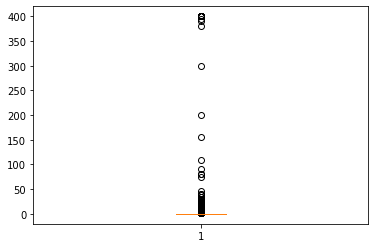

In [55]:
plt.boxplot(data['Price'])
plt.show()

ii. Do you expect apps on the play store to cost $200? Check out these cases

In [57]:
print('yes we can expect apps on the play store to cost $200')
data.loc[data['Price']>= 200]

yes we can expect apps on the play store to cost $200


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


iii. After dropping the useless records, make the suitable plot again to identify 
outliers

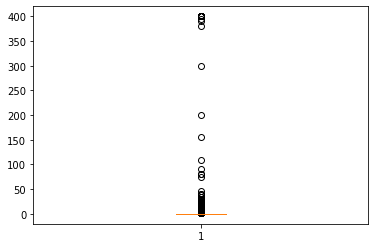

In [59]:
plt.boxplot(data['Price'])
plt.show()

iv. Limit data to records with price < $30# 

In [71]:
data = data[data['Price'] < 30]
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [72]:
data.shape

(10809, 13)

 b. Reviews column

    i. Make suitable plot

C:\Users\pares\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


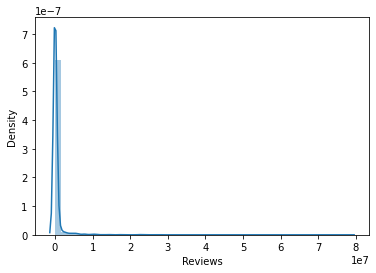

In [74]:
sns.distplot(data['Reviews'])
plt.show()

 ii. Limit data to apps with < 1 Million reviews

In [76]:
data = data[data['Reviews'] < 1000000]
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [77]:
data.shape

(10105, 13)

c. Installs

i. What is the 95th percentile of the installs?

In [79]:
percentile = data.Installs.quantile(0.95)
print(percentile)

10000000.0


ii. Drop records having a value more than the 95th percentile

In [82]:
temp = data[data["Installs"] > percentile].index
data.drop(labels = temp,inplace = True)
print(temp.value_counts().sum())

0


# Data analysis to answer business questions

# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower 
values?

a. How do you explain this?

C:\Users\pares\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


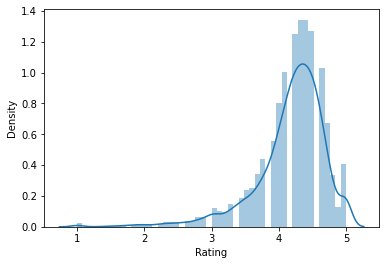

The skewness of this distribution is -1.740120608794253
The Median of this distribution 4.3 is greater than mean 4.17146410803128 of this distribution


In [84]:
sns.distplot(data['Rating'])
plt.show()
print('The skewness of this distribution is',data['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(data.Rating.median(),data.Rating.mean()))

 b. What is the implication of this on your analysis?

In [86]:
data['Rating'].mode()

0    4.3
dtype: float64

# 6. What are the top Content Rating values?

a. Are there any values with very few records?

In [87]:
data['Content Rating'].value_counts()

Everyone           8072
Teen               1025
Mature 17+          455
Everyone 10+        349
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

b. If yes, drop those as they won’t help in the analysis

In [93]:
Adult_rating = data[data['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated =data[data['Content Rating'] == 'Unrated'].index.to_list()
data.drop(Adult_rating, inplace = True)
data.drop(unrated, inplace = True)
data['Content Rating'].value_counts()

Everyone        8072
Teen            1025
Mature 17+       455
Everyone 10+     349
Name: Content Rating, dtype: int64

# 7. Effect of size on rating

a. Make a joinplot to understand the effect of size on rating

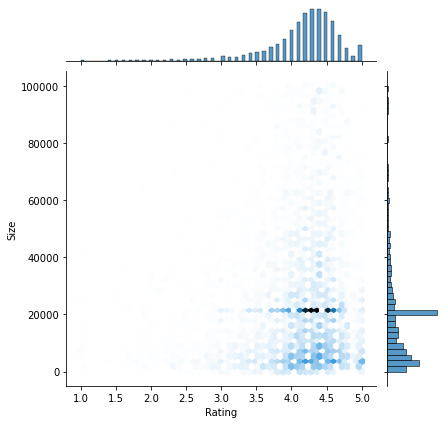

In [98]:
sns.jointplot(x = 'Rating',y = 'Size',data = data,kind = 'hex')
plt.show()

 b. Do you see any patterns?

Yes, patterns can be observed between Size and Rating ie. their is correlation between Size and Rating

 c. How do you explain the pattern?

Generally on increasing Rating, Size of App also increases. But this is not always true ie. for higher Rating, their is constant Size. Thus we can conclude that their is positive correlation between Size and Rating.

# 8. Effect of price on rating

a. Make a jointplot (with regression line)

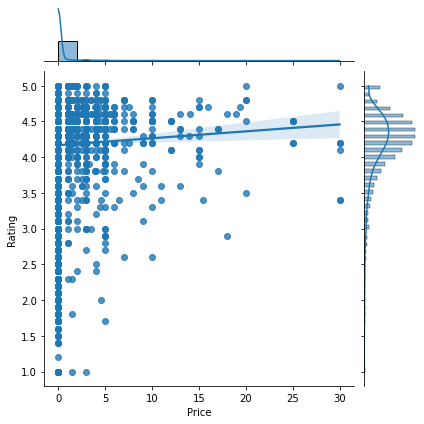

In [99]:
sns.jointplot(x='Price', y='Rating', data=data, kind='reg')
plt.show()

 b. What pattern do you see?

 Generally on increasing the Price, Rating remains almost constant greater than 4.

 c. How do you explain the pattern?

Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price.

 d. Replot the data, this time with only records with price > 0 

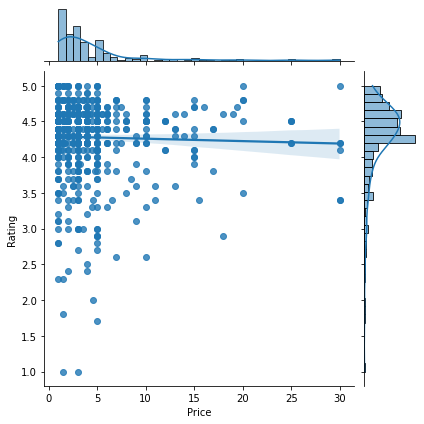

In [105]:
ps1=data.loc[data.Price>0]
sns.jointplot(x='Price', y='Rating', data=ps1, kind='reg')
plt.show()

 e. Does the pattern change?

Yes, On limiting the record with Price > 0, the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating.

 f. What is your overall inference on the effect of price on the rating

Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4

# 9. Look at all the numeric interactions together – 

a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

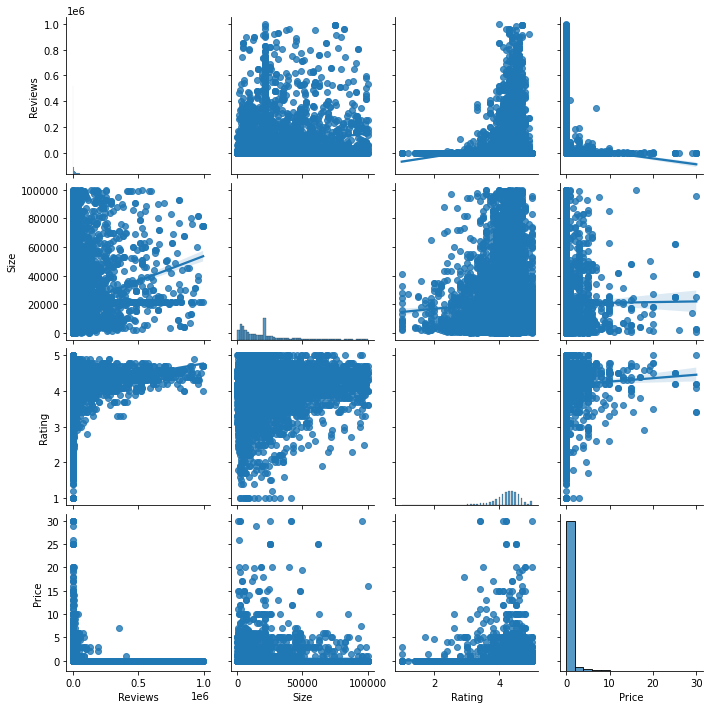

In [107]:
sns.pairplot(data, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

# 10. Rating vs. content rating

a. Make a bar plot displaying the rating for each content rating

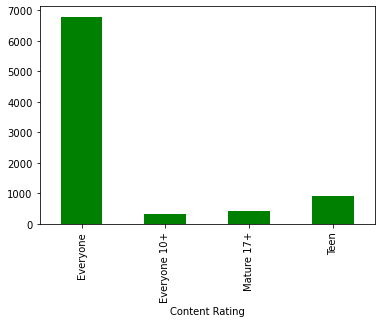

In [110]:
data.groupby(['Content Rating'])['Rating'].count().plot.bar(color="green")
plt.show()

 c. Choose the right metric and plot

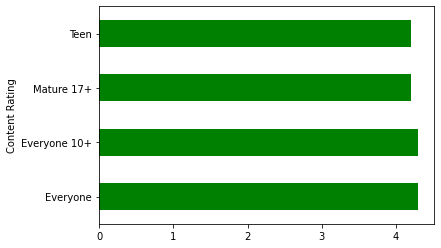

In [111]:
data.groupby(['Content Rating'])['Rating'].median().plot.barh(color="green")
plt.show()

# 11. Content rating vs. size vs. rating – 3 variables at a time

a. Create 5 buckets (20% records in each) based on Size

In [112]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
data['Bucket Size'] = pd.cut(data['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.146605,4.247561,4.010582,4.184469
20k-40k,4.200878,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


 b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each 
combination

In [120]:
temp3=pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp3

Content Rating,Everyone 10+,Mature 17+,Teen
Bucket Size,,,
40k-60k,4.06,NaN,NaN
60k-80k,4.00,NaN,4.0
80k-100k,NaN,4.0,4.0


 c. Make a heatmap of this

 i. Annotated

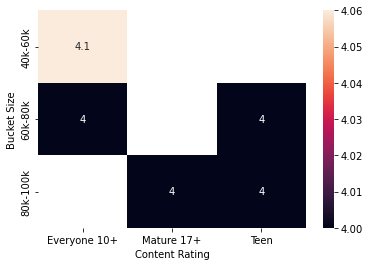

In [121]:
sns.heatmap(temp3, annot = True)
plt.show()

 ii. Greens color map

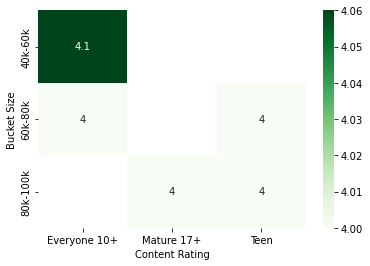

In [126]:
sns.heatmap(temp3, annot=True, cmap='Greens')
plt.show()